numpy로 데이터 준비하기

In [1]:
##도미와 비교할 빙어 데이터 준비하기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0,
               30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
               33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
               36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5,
               10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
               500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
               610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
               714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

## column_stack() 메소드로 fish_data를 배열로 생성
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:3])
print(np.ones(3))


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]
[1. 1. 1.]


In [3]:
## numpy의 ones()메소드와 zeros() 메소드로 0과 1의 숫자 인덱스 생성
## concatenate() 메소드를 이용해서 각각의 인덱스를 연결하여 하나로 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


사이킷런으로 훈련세트와 테스트 세트 나누기

In [4]:
## 사이킷런의 model_selection에 훈련세트와 테스트세트 나누는 train_test_splt() 메소드 사용
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42)

In [6]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


수상한 도미 한마리

In [8]:
## k-최근접이웃 분류기 생성하고 훈련(fit) 및 테스트 (score)
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

데이터 기준(표준점수)을 맞춘 전처리 데이터로 모델 훈련하기


*   x축 값을 0~1,000사이로 스케일링 하기
*   x축 값을 표준점수로 전처리해서 훈련하기



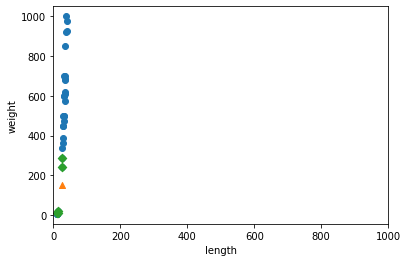

In [11]:
## 길이보다는 무게에 따른 특성차가 크기 때문에 x축의 범위(0~1,000)를 동일하게 재배치함
## xlim() 메소드는 x축을 기준으로 재배치, ylim()은 y축을 기준으로 재배치
import matplotlib.pyplot as plt
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker ='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
## 학습데이터에 대해서 표준점수 구하기 : (특성값 - 평균) / 표준편차
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [24]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

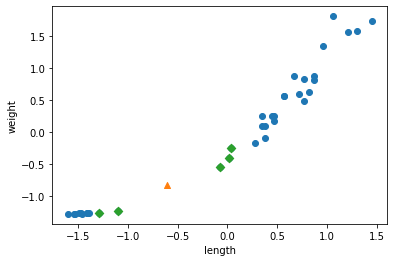

In [41]:
## 길이 20, 무게 150 생선을 표준점수 기준으로 예측 - 도미로 예상
new = ([20,150] - mean)/ std
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


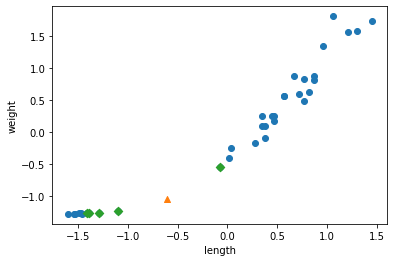

[0.]


In [42]:
## 길이 20, 무게 80 생선을 표준점수 기준으로 예측 - 도미로 예상
new = ([20,80] - mean)/ std
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean)/ std
kn.score(test_scaled, test_target)

print(kn.predict([new]))


응용 실습 - 도미와 roach에 대해서 실습

In [43]:
##도미와 비교할 roach 데이터 준비

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
              31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
              34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
              38.5, 38.5, 39.5, 41.0, 41.0, 14.1, 18.2, 18.8, 19.8, 20, 20.5,
               20.8, 21, 22, 22, 22.5, 22.5, 22.5, 24, 23.4, 23.5, 25.2, 26, 27, 31.7]
              

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
               500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
               610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
               714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 40, 69,
               78, 87, 120, 0, 110, 120, 150, 145, 160, 140, 160, 169, 161, 200, 180, 290, 272, 390]


In [44]:
import numpy as np

## column_stack() 메소드로 fish_data를 배열로 생성
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:3])
print(np.ones(3))


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]
[1. 1. 1.]


In [45]:
## numpy의 ones()메소드와 zeros() 메소드로 0과 1의 숫자 인덱스 생성
## concatenate() 메소드를 이용해서 각각의 인덱스를 연결하여 하나로 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(20)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [46]:
## 사이킷런의 model_selection에 훈련세트와 테스트세트 나누는 train_test_splt() 메소드 사용
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 55)

In [47]:
## 학습데이터에 대해서 표준점수 구하기 : (특성값 - 평균) / 표준편차
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std

[ 30.03902439 489.3902439 ] [  6.74937678 300.97604459]


In [48]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

0.9285714285714286

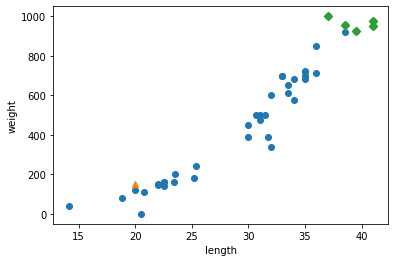

In [53]:
distances, indexes = kn.kneighbors([[20,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

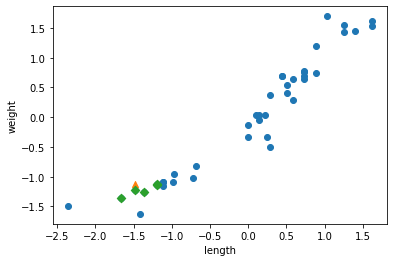

[0.]


In [51]:
## 길이 20, 무게 150 생선을 표준점수 기준으로 예측 - 도미로 예상
new = ([20,150] - mean)/ std
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(kn.predict([new]))

